In [212]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import torch
from torch.nn import functional as F
from torch import nn, optim
import torchvision
from torch.utils.data import Dataset, TensorDataset

import os

In [21]:
# read the img
img=cv2.imread('Train/original_retinal_images/IDRiD_03.jpg')
img.shape

(2848, 4288, 3)

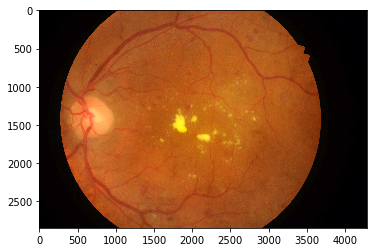

In [22]:
# use matplotlib.pyplot to show the gray level img
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

(2848, 3500, 3)

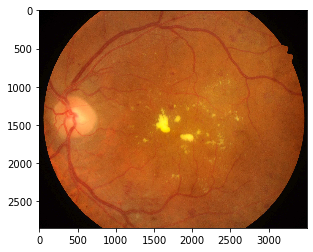

In [32]:
# Original image (4288 × 2848) is cropped to (3500 × 2848) 
img1 = img[:,220:3720,:]
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
img1.shape

(3500, 3500, 3)

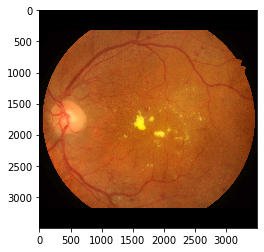

In [33]:
# Then, images are padded to (3500 × 3500)
img1 = np.pad(img1,((326,326),(0,0),(0,0)),'constant',constant_values = (0))
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
img1.shape

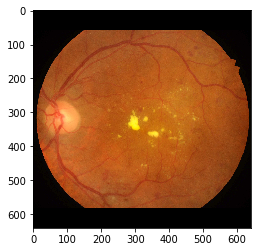

In [40]:
# resized to (640 × 640) through bicubic interpolation
img_640 = cv2.resize(src=img1, dsize=(640, 640), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(img_640, cv2.COLOR_BGR2RGB))

In [41]:
img_640 = (img_640/255)
np.mean(img_640)

0.2682101651858661

In [232]:
def pre_processing(img_name):
    # read the img
    img=cv2.imread(img_name)
    # Original image (4288 × 2848) is cropped to (3500 × 2848) 
    img1 = img[:,220:3720,-1]
#     img1_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Then, images are padded to (3500 × 3500)
    img1_gray = np.pad(img1,((326,326),(0,0)),'constant',constant_values = (0))
    # resized to (640 × 640) through bicubic interpolation
    img_640 = cv2.resize(src=img1_gray, dsize=(1280, 1280), interpolation=cv2.INTER_CUBIC)
    return img_640

def pre_processing_or(img_name):
    # read the img
    img=cv2.imread(img_name)
    # Original image (4288 × 2848) is cropped to (3500 × 2848) 
    img1 = img[:,220:3720,:]
#     img1_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Then, images are padded to (3500 × 3500)
    img1 = np.pad(img1,((326,326),(0,0),(0,0)),'constant',constant_values = (0))
    # resized to (640 × 640) through bicubic interpolation
    img_640 = cv2.resize(src=img1, dsize=(1280, 1280), interpolation=cv2.INTER_CUBIC)
    return img_640

In [235]:
import os

path = "Test/masks_Microaneurysms/" #文件夹目录
write_path = 'Test1/masks_Microaneurysms_pre_1280/'
def pre_processing_new_img(path, write_path):
    files= os.listdir(path) #得到文件夹下的所有文件名称
    for file_name in files: #遍历文件夹
        print(file_name)
        if not os.path.isdir(file_name) and file_name[0] not in ['.', 'd']: #判断是否是文件夹，不是文件夹才打开
            file = pre_processing(path + file_name)
            cv2.imwrite(write_path+file_name,file)
pre_processing_new_img(path,write_path)

IDRiD_80_MA.tif
IDRiD_73_MA.tif
IDRiD_61_MA.tif
IDRiD_57_MA.tif
IDRiD_63_MA.tif
IDRiD_71_MA.tif
IDRiD_59_MA.tif
IDRiD_55_MA.tif
IDRiD_75_MA.tif
IDRiD_79_MA.tif
IDRiD_67_MA.tif
IDRiD_65_MA.tif
IDRiD_77_MA.tif
IDRiD_69_MA.tif
IDRiD_56_MA.tif
IDRiD_72_MA.tif
IDRiD_60_MA.tif
IDRiD_81_MA.tif
IDRiD_58_MA.tif
IDRiD_62_MA.tif
IDRiD_70_MA.tif
desktop.ini
IDRiD_74_MA.tif
IDRiD_66_MA.tif
IDRiD_78_MA.tif
IDRiD_64_MA.tif
IDRiD_68_MA.tif
IDRiD_76_MA.tif


In [236]:
path = "Test/original_retinal_images/" #文件夹目录
write_path = 'Test1/original_retinal_images_pre_1280/'
def pre_processing_new_img_or(path, write_path):
    files= os.listdir(path) #得到文件夹下的所有文件名称
    for file_name in files: #遍历文件夹
        print(file_name)
        if not os.path.isdir(file_name) and file_name[0]!='.': #判断是否是文件夹，不是文件夹才打开
            file = pre_processing_or(path + file_name)
            cv2.imwrite(write_path+file_name,file)
pre_processing_new_img_or(path,write_path)

IDRiD_78.jpg
IDRiD_79.jpg
IDRiD_56.jpg
IDRiD_81.jpg
IDRiD_80.jpg
IDRiD_57.jpg
IDRiD_55.jpg
IDRiD_69.jpg
IDRiD_68.jpg
IDRiD_59.jpg
IDRiD_65.jpg
IDRiD_71.jpg
IDRiD_70.jpg
IDRiD_64.jpg
IDRiD_58.jpg
IDRiD_72.jpg
IDRiD_66.jpg
IDRiD_67.jpg
IDRiD_73.jpg
IDRiD_77.jpg
IDRiD_63.jpg
IDRiD_62.jpg
IDRiD_76.jpg
IDRiD_60.jpg
IDRiD_74.jpg
IDRiD_75.jpg
IDRiD_61.jpg


In [44]:
import torch
from torch.nn import functional as F
from torch import nn, optim
import torchvision

In [45]:
# transforms = torchvision.transforms.Compose([
#     torchvision.transforms.Grayscale(num_output_channels=1),
#     torchvision.transforms.ToTensor(),
    
# ])

In [46]:
# Train = torchvision.datasets.ImageFolder('Train1/',transform=transforms)
# Test = torchvision.datasets.ImageFolder('Test1/',transform=transforms)

In [163]:
def get_data(data_name, flag):
    if flag == 'train':
        label_path = "Train1/" + data_name + '/' #文件夹目录
        data_path = 'Train1/original_retinal_images_pre/'
    else:
        label_path = "Test1/" + data_name + '/' #文件夹目录
        data_path = 'Test1/original_retinal_images_pre/'
    # get data
    datas = []
    labels = []
    files= sorted(os.listdir(label_path)) #得到文件夹下的所有文件名称
    for file_name in files: #遍历文件夹
#         print(file_name)
        if not os.path.isdir(file_name) and file_name[0]!='.': #判断是否是文件夹，不是文件夹才打开
            label = cv2.imread(label_path + file_name, 0)
            data = cv2.imread(data_path + file_name[:-7] + '.jpg')
            datas.append(data)
            labels.append(label)
    datas = np.array(datas)
    labels = np.array(labels)
#     print(labels.shape)
#     TensorDataset = torch.utils.data.TensorDataset(torch.tensor(labels), torch.tensor(datas))
    return datas, labels
            
#     # Each image is divided 255 to bound values onto [0,1].
#     img_nor = img_640/255
#     # In case of HE and MA, each image is divided by 255 and then subtracted with the mean.
#     img_res = img_nor - np.mean(img_nor)

In [191]:
datas,labels = get_data("masks_Haemorrhages_pre",'train')
datas_nor = torch.tensor(datas/255)
labels_nor = torch.tensor(labels/255)
datas_nor = datas_nor.permute(0,3,1,2)
labels_nor = labels_nor.view(labels.shape[0],1,640,640)
# datas_nor.shape, labels_nor.shape
train_data = torch.utils.data.TensorDataset(datas_nor, labels_nor)
train_loader =  torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=False)

In [192]:
datas,labels = get_data("masks_Haemorrhages_pre",'test')
datas_nor = torch.tensor(datas/255)
labels_nor = torch.tensor(labels/255)
datas_nor = datas_nor.permute(0,3,1,2)
labels_nor = labels_nor.view(labels.shape[0],1,640,640)
# datas_nor.shape, labels_nor.shape
test_data = torch.utils.data.TensorDataset(datas_nor, labels_nor)
test_loader =  torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

In [193]:
class DoubleConv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, 1, 1),
            nn.BatchNorm2d(out_ch), #添加了BN层
            nn.ReLU(),
            nn.Conv2d(out_ch, out_ch, 3, 1, 1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU()
        )

    def forward(self, x):
        return self.conv(x)

class OneConv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, 1, 1),
            nn.BatchNorm2d(out_ch), #添加了BN层
            nn.ReLU(),
        )

    def forward(self, x):
        return self.conv(x)

class Unet(nn.Module):
    def __init__(self):
        super(Unet, self).__init__()
        self.conv1 = DoubleConv(3, 32)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = DoubleConv(32, 64)
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = DoubleConv(64, 128)
        self.pool3 = nn.MaxPool2d(2)
        self.conv4 = DoubleConv(128, 256)
        self.pool4 = nn.MaxPool2d(2)
        self.conv5 = DoubleConv(256, 512)
        self.pool5 = nn.MaxPool2d(2)
        self.conv6 = DoubleConv(512, 512)
        self.pool6 = nn.MaxPool2d(2)
        self.conv7 = DoubleConv(512, 512)
        # 逆卷积，也可以使用上采样
        self.up1 = nn.Upsample(2)
        self.conv8 = OneConv(512, 512)
        self.conv9 = DoubleConv(1024, 512)
        self.up2 = nn.Upsample(2)
        self.conv10 = OneConv(512, 512)
        self.conv11 = DoubleConv(1024, 512)
        self.up3 = nn.Upsample(2)
        self.conv12 = OneConv(512, 256)
        self.conv13 = DoubleConv(512, 256)
        self.up4 = nn.Upsample(2)
        self.conv14 = OneConv(256, 128)
        self.conv15 = DoubleConv(256, 128)
        self.up5 = nn.Upsample(2)
        self.conv16 = OneConv(128, 64)
        self.conv17 = DoubleConv(128, 64)
        self.up6 = nn.Upsample(2)
        self.conv18 = OneConv(64, 32)
        self.conv19 = DoubleConv(64, 32)
        self.conv20 = nn.Sequential(
            nn.Conv2d(32, 1, 3, 1, 1),
            nn.Sigmoid()
        )
        
    def forward_he_hm(self, x):
        c1 = self.conv1(x)
        p1 = self.pool1(c1)
        c2 = self.conv2(p1)
        p2 = self.pool2(c2)
        c3 = self.conv3(p2)
        p3 = self.pool3(c3)
        c4 = self.conv4(p3)
        p4 = self.pool4(c4)
        c5 = self.conv5(p4)
        p5 = self.pool5(c5)
        c6 = self.conv6(p5)
        p6 = self.pool6(c6)
        c7 = self.conv7(p6)
        up1 = self.up1(c7)
        c8 = self.conv8(up1)
        concat1 = torch.cat([c8, c6], dim=1)
        c9 = self.conv9(concat1)
        up2 = self.up2(c9)
        c10 = self.conv10(up2)
        concat2 = torch.cat([c10, c5], dim=1)
        c11 = self.conv11(concat2)
        up3 = self.up3(c11)
        c12 = self.conv12(up3)
        concat3 = torch.cat([c12, c4], dim=1)
        c13 = self.conv13(concat3)
        up4 = self.up4(c13)
        c14 = self.conv14(up4)
        concat4 = torch.cat([c14, c3], dim=1)
        c15 = self.conv15(concat4)
        up5 = self.up5(c15)
        c16 = self.conv16(up5)
        concat5 = torch.cat([c16, c2], dim=1)
        c17 = self.conv17(concat5)
        up6 = self.up5(c17)
        concat6 = torch.cat([c18, c1], dim=1)
        c19 = self.conv19(concat6)
        out = self.conv20(c19)
        return out

In [ ]:
class NNModel:
    def __init__(self, network, learning_rate, train_loader, test_loader):
        self.trainloader = train_loader
        self.testloader = test_loader
        self.model = network
        self.lossfn = nn.BCELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate, betas=(0.5,0.999))
        self.num_train_samples = len(self.trainloader)
        self.num_test_samples = len(self.testloader)

#     def view_batch(self):

#         dataiter = iter(self.trainloader)
#         imgs, labels = next(dataiter)
#         imgs = imgs.view(64,28,28).view(8,8,28,28).permute(0,2,1,3).contiguous().view(8*28,8*28)
#         labels = labels.view(8,8)
#         return imgs, labels

    def train_epoch(self):
        self.model.train()
        for images, labels in self.trainloader:
            log_ps = self.model(images)
            loss = self.lossfn(log_ps, labels)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        return

    
    def eval(self):
        self.model.eval()
        accuracy = 0
        with torch.no_grad():
            for images, labels in self.testloader:
                log_ps = self.model(images)

In [101]:
model = Unet(train_loader,test_loader)
# Define your learning rate
learning_rate = 2e−4
m = NNModel(Unet, learning_rate)
epochs = 100
for e in range(epochs):
    m.train_epoch()
    m.eval()

AssertionError: 

In [72]:
Train[1]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]), 0)

In [47]:
Train.classes

['masks_Haemorrhages_pre',
 'masks_Hard_Exudates_pre',
 'masks_Microaneurysms_pre',
 'masks_Soft_Exudates_pre',
 'original_retinal_images_pre']

In [67]:
Train.class_to_idx

{'masks_Haemorrhages_pre': 0,
 'masks_Hard_Exudates_pre': 1,
 'masks_Microaneurysms_pre': 2,
 'masks_Soft_Exudates_pre': 3,
 'original_retinal_images_pre': 4}

In [93]:
# Each image is divided 255 to bound values onto [0,1].
#     # In case of HE and MA, each image is divided by 255 and then subtracted with the mean.
#     img_res = img_nor - np.mean(img_nor)
masks_Haemorrhages_pre=np.array(masks_Haemorrhages_pre)
masks_Haemorrhages_pre.shape

(53, 1, 640, 640)

In [77]:
#数据增广

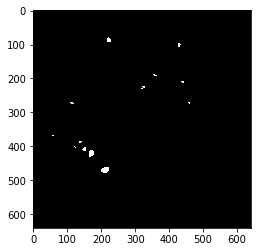

In [53]:
images,_ = next(iter(datalaoder))
out = torchvision.utils.make_grid(images,nrow=2)
plt.imshow(images.squeeze(),'gray')

In [61]:
images.squeeze()

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

(640, 640)

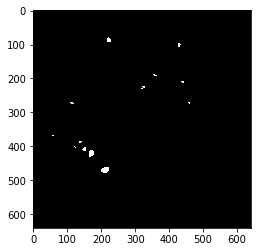

In [210]:
x=cv2.imread('Train1/masks_Haemorrhages_pre/IDRiD_01_HE.tif',0)
plt.imshow(x,'gray')
x.shape

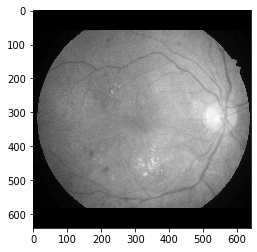

In [205]:
x1=cv2.imread('Train1/original_retinal_images_pre/IDRiD_01.jpg',0)
plt.imshow(x1,'gray')

torch.Size([1, 640, 640])


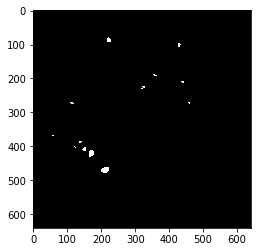

In [226]:
a=torchvision.transforms.ToTensor()(x)
print(a.shape)
a.squeeze().view(640,640,1)
a=torchvision.transforms.ToPILImage()(a)

plt.imshow(a,'gray')
np.array(a).shape
a.save('a.jpg')

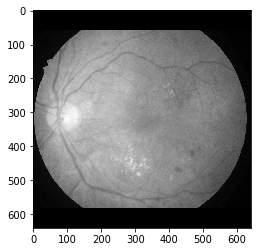

In [218]:
from PIL import Image
a=torchvision.transforms.ToTensor()(x1)
a=torchvision.transforms.ToPILImage()(a)
a=torchvision.transforms.RandomHorizontalFlip(p=1)(a)
plt.imshow(a,'gray')
a.save('Train1/a.jpg')

In [217]:
a=2e-4

In [214]:
a

0.0002